## mmdcells
Extract blood cells and separate them.

## Description

A microscopic gray-scale image containing blood cells is segmented and further processed for the separation of superposed cells. The segmentation procedure is based on gray-scale connected filtering and threshold, while the separation procedure is based on the classical watershed approach

In [1]:
import numpy as np
from PIL import Image
import ia870 as ia


# Reading
Reading and elimination of white pores
First, the blood cells image is read. Then, the gray-scale area open operator is applied for removing small white pores over the cells

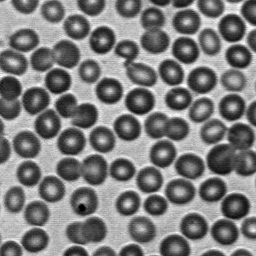

In [2]:
a_pil = Image.open('data/bloodcells.tif').convert('L')
a_pil

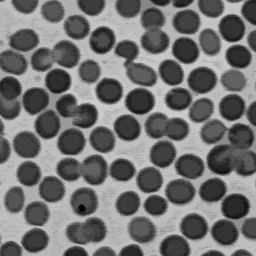

In [3]:
a = np.array (a_pil)
b = ia.iaareaopen(a, 200)
Image.fromarray(b)

# Threshold and shape smoothing
The threshold of dark areas produces the segmented image (i.e., the region where there are cells). Then the opening by a small disk performs smoothing of the cells borders

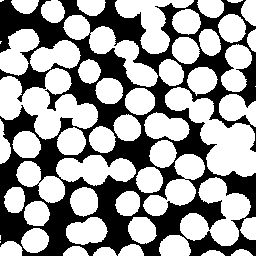

In [4]:
c = (b < 140)
Image.fromarray(c.astype(np.uint8)*255)

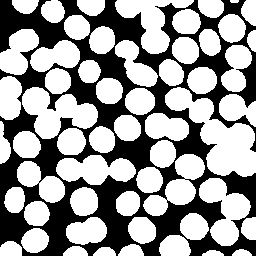

In [5]:
d = ia.iaopen (c, ia.iasedisk(2,'2D','OCTAGON'));
Image.fromarray(d.astype(np.uint8)*255)

# Marking
A marker for each cell is obtained by dilating the regional maximum of the distance transform. 
For visualization illustration, the distance transform is viewed as a topographic surface shading on the left and the dilated regional 
maximum is displayed in read overlayed on the surface view. 

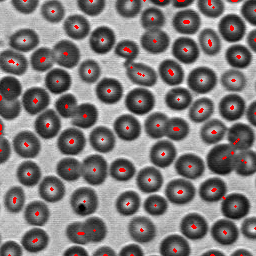

In [6]:
e1 = np.uint8(ia.iadist(d, Bc=ia.iasebox(1),METRIC='EUCLIDEAN'))# uint16
#e1 = ia.iadist(d, mmsebox,'EUCLIDEAN');
#e2 = mmsurf(e1);
#mmshow( e2);
e3 = ia.iaregmax(e1);
e  = ia.iadil(e3);
#mmshow( e2, e);
Image.fromarray(ia.iagshow(a, e).transpose(1, 2, 0))

# Geodesic SKIZ
The watershed, constrained by the makers image, is applied to the negation of the distance function. 
The result of this procedure is also called geodesic SKIZ. For visualization, on the left the negate distance function is displayed 
as a topographic surface, and on the right this surface is superposed by the markers and the detected watershed lines. 

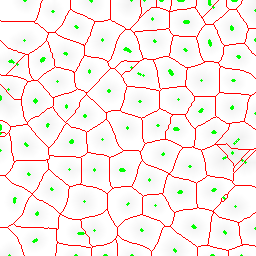

In [7]:
f = ia.ianeg(e1)
g = ia.iacwatershed( f, e, ia.iasebox())
Image.fromarray(ia.iagshow(f, g, e).transpose(1, 2, 0))

# Cell separation
The geodesic SKIZ (i.e., watershed division lines) is subtracted from the segmented image,
separating the cells. On the left the detected watershed lines is overlayed on the cells binary image, 
and on the right, the cells image separated using the watershed lines. 

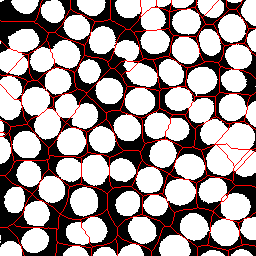

In [8]:
Image.fromarray(ia.iagshow(c, g).transpose(1, 2, 0))

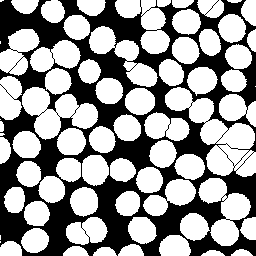

In [9]:
h = ia.iaintersec(c,ia.ianeg(g));
Image.fromarray(ia.iagshow(h).transpose(1, 2, 0))

# Edge off
The cells that touch the frame of the image are removed.

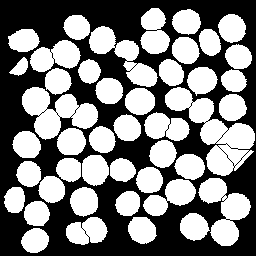

In [10]:
i = ia.iaedgeoff(h)
Image.fromarray(ia.iagshow(i).transpose(1, 2, 0))

# Final display
Superposition of the contour of the detected cells on the original image.

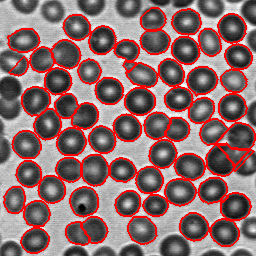

In [11]:
j=ia.iagradm(i);
Image.fromarray(ia.iagshow(a, j).transpose(1, 2, 0))